In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/accounts_user.parquet'

# 데이터 불러오기
user_df = pd.read_parquet(gcs_path, engine='pyarrow')
user_df.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


In [4]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677083 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 non-null  object        
 11  report_count        677085 non-null  int64         
 12  alarm_count         677085 non-null  int64         
 13  pending_chat        677085 no

In [5]:
user_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,677085.0,NaN,NaN,NaN,1212969.125237,831956.0,1028075.0,1211729.0,1397906.0,1583733.0,213897.052019
is_superuser,677085.0,NaN,NaN,NaN,0.000003,0.0,0.0,0.0,0.0,1.0,0.001719
is_staff,677085.0,NaN,NaN,NaN,0.000004,0.0,0.0,0.0,0.0,1.0,0.002105
gender,677083,2,F,396665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
point,677085.0,NaN,NaN,NaN,3039.144837,0.0,400.0,965.0,2183.0,885000006.0,1076019.94305
friend_id_list,677085,674117,[],2874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_push_on,677085.0,NaN,NaN,NaN,0.843098,0.0,1.0,1.0,1.0,1.0,0.363709
created_at,677085,NaN,NaN,NaN,2023-05-15 22:46:01.709213440,2023-03-29 03:44:14.047130,2023-05-09 01:35:23.126586880,2023-05-13 10:50:57.476214016,2023-05-20 07:49:47.800349952,2024-05-09 08:31:17.710824,NaN
block_user_id_list,677085,11685,[],664042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hide_user_id_list,677085,74995,[],598352,NaN,NaN,NaN,NaN,NaN,NaN,NaN


gender             
- 677,083개 존재 (2개 결측치)
- 성별 중 F(여성)가 가장 많고, 396,665명           
→ 남성(F가 아닌 값)은 약 280,418명                    
            
point
- 평균 포인트: 3,039점, 중앙값은 965점    
- 최댓값: 8억 8천만 이상 → 극단치 있음 (이상치 가능성 높음)                             
→ 포인트 분포가 매우 비대칭이며, 이상치 제거 필요    
            
friend_id_list
- 고유값이 674,117개 → 거의 모든 유저가 고유한 친구 목록                  
- []인 경우가 가장 많음 (2874명)                 
→ 대부분 친구가 있으나 일부는 없음            
                        
is_push_on
- 평균이 0.8431 → 대다수가 푸시 알림을 켜둠    
→ 푸시 알림 사용률 약 84%    
      
created_at                   
- 가입일 정보
- 최소: 2023-03-29, 최대: 2024-05-09
→ 데이터 수집 범위는 약 1년 1개월            
             
block_user_id_list              
- 대부분 [], 고유값 11,685개
- 가장 많이 나타난 값 []의 빈도는 664,042명
→ 98%는 아무도 차단하지 않음            
               
hide_user_id_list                        
- [] 빈도도 매우 높음 → 기본은 숨김 없음               
→ 숨긴 유저가 있는 경우는 소수    
               
report_count                  
- 평균 신고 횟수: 0.037회
- 대부분은 0회, 최대 253회
→ 일부 유저만 다수 신고, 이상치 주의                      
                 
alarm_count
- 평균 알람 수: 0.95, 중앙값은 1              
- 최댓값: 40,878 → 극단치 존재
→ 일부 유저가 알람을 과도하게 보유              
                 


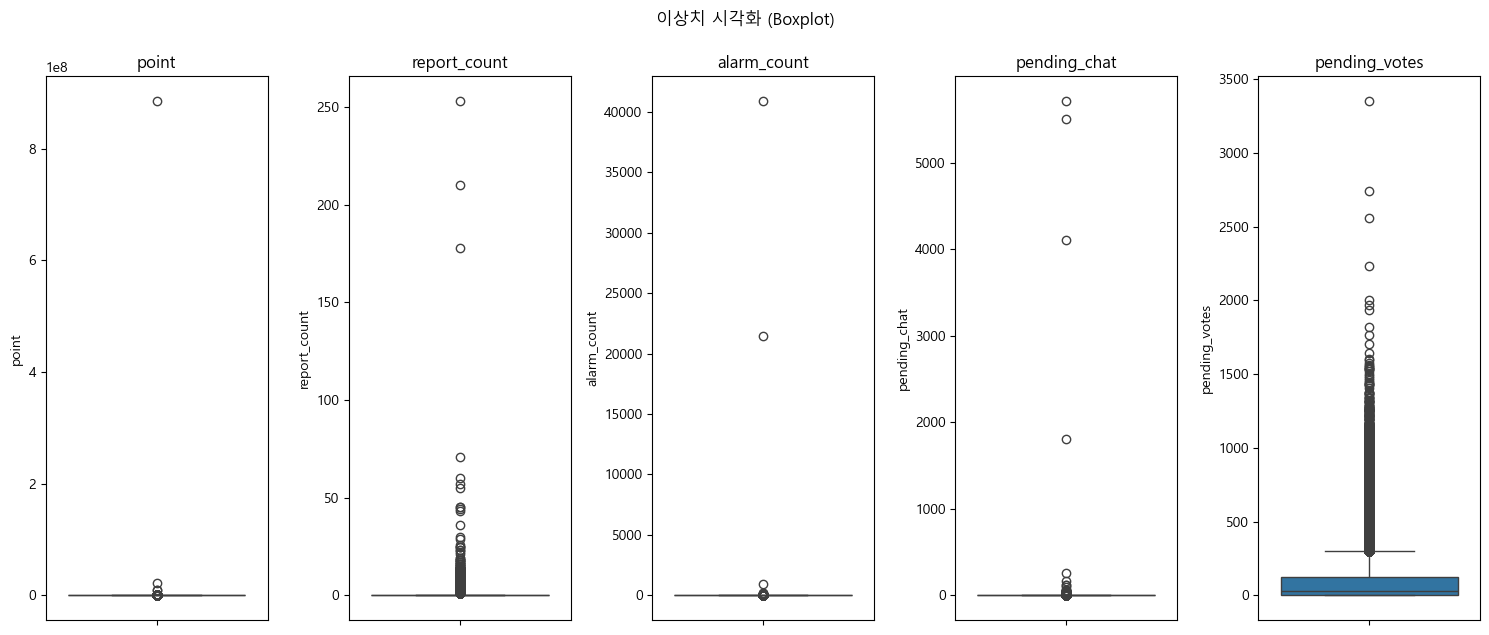

c:\Users\jey34\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


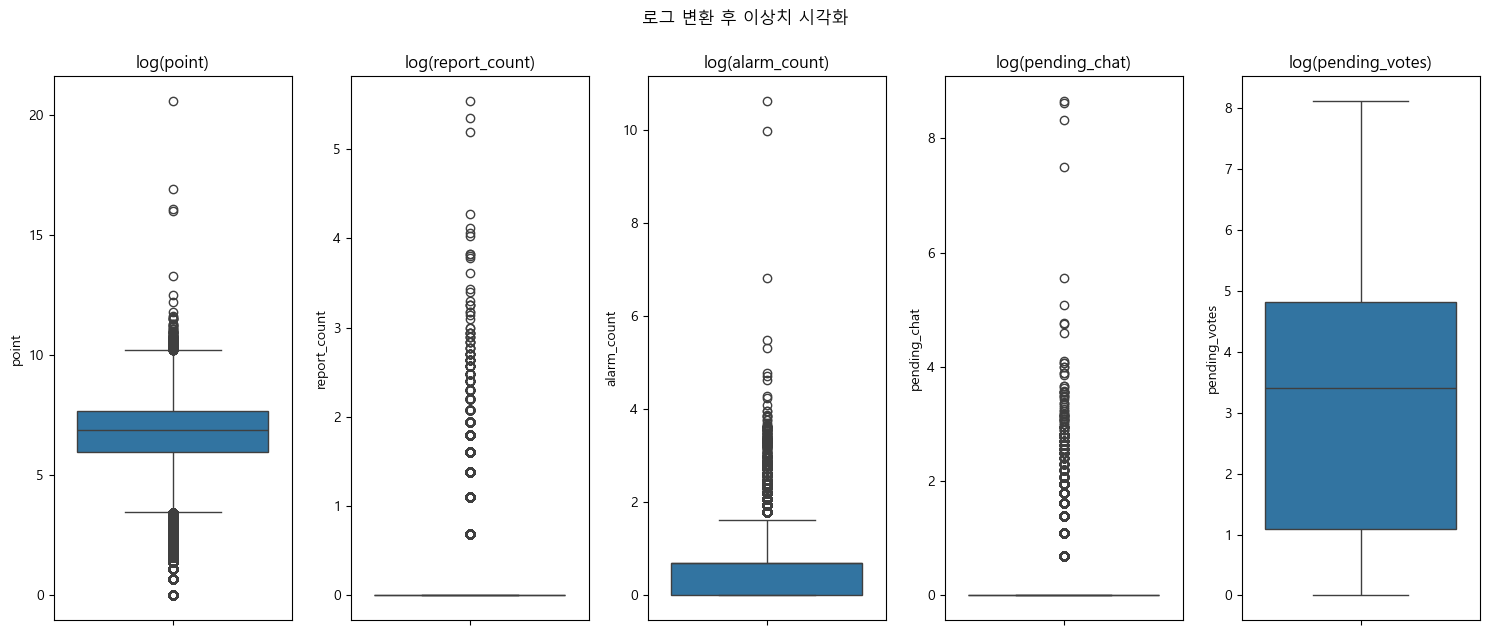

In [23]:
# 이상치 보기 좋은 변수 리스트
columns = ['point', 'report_count', 'alarm_count', 'pending_chat', 'pending_votes']

# Boxplot
plt.figure(figsize=(15, 6))
for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i+1)
    sns.boxplot(y=user_df[col])
    plt.title(f'{col}')
    plt.tight_layout()
plt.suptitle('이상치 시각화 (Boxplot)', y=1.05)
plt.show()

# 로그 변환 후 boxplot
import numpy as np

plt.figure(figsize=(15, 6))
for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i+1)
    log_values = np.log1p(user_df[col])  # log(1 + x)
    sns.boxplot(y=log_values)
    plt.title(f'log({col})')
    plt.tight_layout()
plt.suptitle('로그 변환 후 이상치 시각화', y=1.05)
plt.show()

In [6]:
user_df.dtypes

id                             int64
is_superuser                   int64
is_staff                       int64
gender                        object
point                          int64
friend_id_list                object
is_push_on                     int64
created_at            datetime64[ns]
block_user_id_list            object
hide_user_id_list             object
ban_status                    object
report_count                   int64
alarm_count                    int64
pending_chat                   int64
pending_votes                  int64
group_id                     float64
dtype: object

In [7]:
user_df.isnull().sum()

id                    0
is_superuser          0
is_staff              0
gender                2
point                 0
friend_id_list        0
is_push_on            0
created_at            0
block_user_id_list    0
hide_user_id_list     0
ban_status            0
report_count          0
alarm_count           0
pending_chat          0
pending_votes         0
group_id              3
dtype: int64

#### 1. 시간 기반 분석 (created_at)
- 가입자 수의 시간 흐름 파악
- 가입 시점의 밀집 구간 확인 (시간대, 요일별)

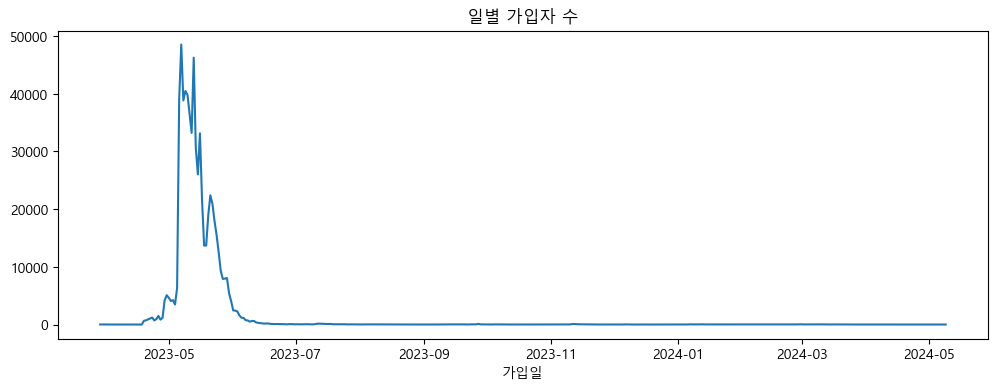

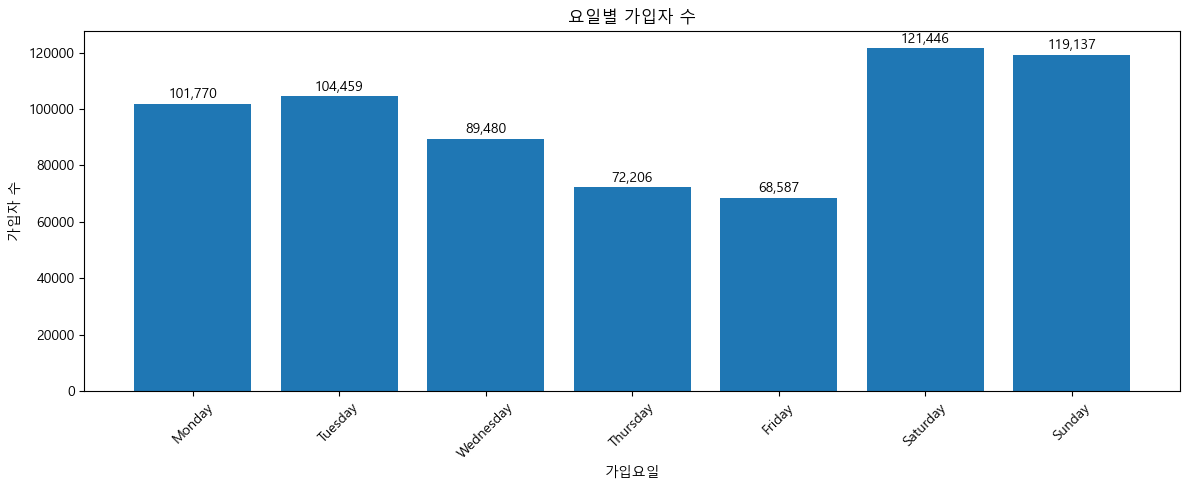

In [11]:
user_df['created_at'] = pd.to_datetime(user_df['created_at'])
user_df['가입일'] = user_df['created_at'].dt.date
user_df['가입요일'] = user_df['created_at'].dt.day_name()

# 일별 가입자 수
user_df['가입일'].value_counts().sort_index().plot(figsize=(12, 4), title="일별 가입자 수")

# 요일별 가입자 수 계산
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = user_df['가입요일'].value_counts().reindex(weekday_order)

# 그래프 그리기
plt.figure(figsize=(12, 5))
bars = plt.bar(weekday_counts.index, weekday_counts.values)

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=10)

# 축 설정
plt.xticks(rotation=45)
plt.xlabel("가입요일")
plt.ylabel("가입자 수")
plt.title("요일별 가입자 수")
plt.tight_layout()
plt.show()

In [12]:
user_df['가입일'] = user_df['created_at'].dt.date
user_df['가입월'] = user_df['created_at'].dt.to_period('M').astype(str)
user_df['가입시간대'] = user_df['created_at'].dt.hour

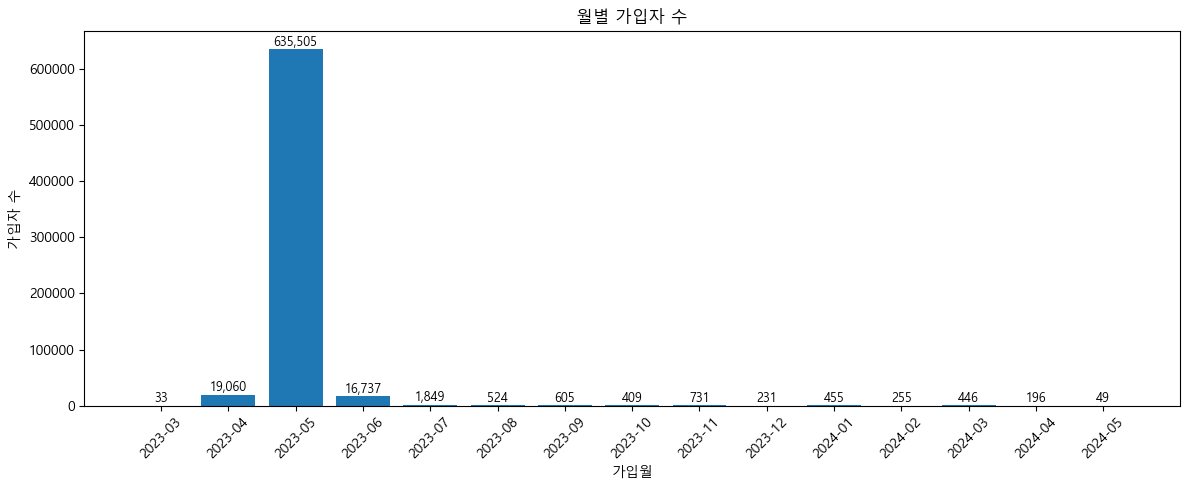

In [13]:
# 월별 가입자 수
monthly_counts = user_df['가입월'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
bars = plt.bar(monthly_counts.index, monthly_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{int(height):,}',
             ha='center', va='bottom', fontsize=9)
plt.title('월별 가입자 수')
plt.xlabel('가입월')
plt.ylabel('가입자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

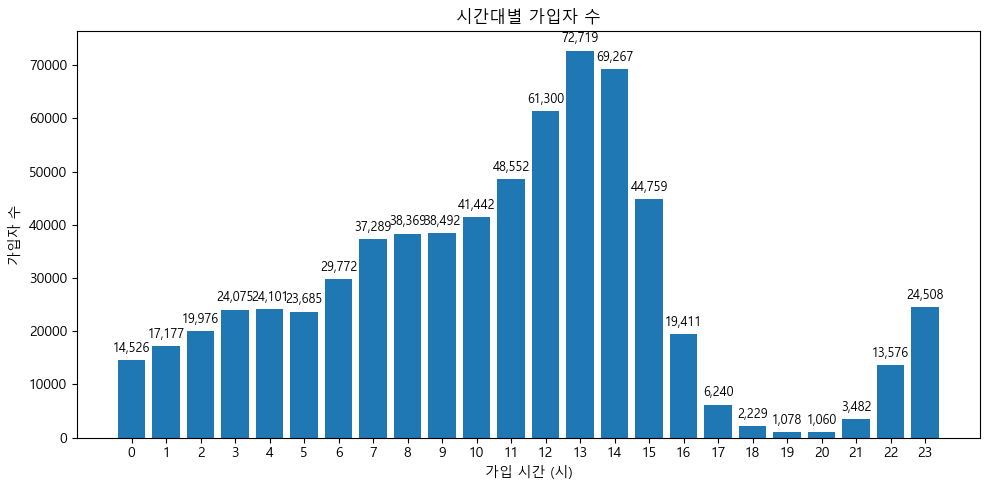

In [14]:
# 시간대 컬럼 생성
user_df['가입시간대'] = user_df['created_at'].dt.hour

# 시간대별 가입자 수 계산
hourly_counts = user_df['가입시간대'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(hourly_counts.index.astype(str), hourly_counts.values)

# 막대 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, f'{int(height):,}',
             ha='center', va='bottom', fontsize=9)

plt.title('시간대별 가입자 수')
plt.xlabel('가입 시간 (시)')
plt.ylabel('가입자 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 2. 푸시 수신 여부(is_push_on)에 따른 행동 차이
- 푸시 알림 설정 여부에 따라 유저의 alarm_count, pending_chat 등 차이 분석


In [15]:
user_df.groupby('is_push_on')[['alarm_count', 'pending_chat']].mean()

,alarm_count,pending_chat
is_push_on,,
0,0.877857,0.052525
1,0.959448,0.107020


- 푸시 알림을 켠 유저는 alarm_count와 pending_chat 수치가 모두 더 높음
- → 알림을 수신함으로써 더 많은 알람을 확인하고, 대화 대기 상태로 남겨진 횟수도 많아짐
- 이는 푸시 설정이 서비스 참여도 및 반응성에 영향을 미침을 시사함

####  3. 신고/차단/숨김 행동 사용자 분석
- block_user_id_list, report_count, hide_user_id_list 등으로 유저의 상호작용 행동량 파악
- 예: 차단한 유저 수 (리스트 길이로 파악), 신고 많이 받은 유저 상위 확인

In [16]:
# 차단한 유저 수 컬럼 생성
user_df['block_user_count'] = user_df['block_user_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 상위 신고 많이 받은 유저
user_df[['report_count']].sort_values(by='report_count', ascending=False).head()

,report_count
1,253
50,210
693,178
671688,71
62525,60


- 253회까지 신고받은 유저도 존재 → 악성 유저 가능성 매우 큼


#### 4. ban_status(차단/탈퇴) 유저 분석
- 탈퇴/차단된 유저 비율
- 이들의 행동 특성 (가입 후 금방 탈퇴? 활동량 적음?)

In [17]:
# 비율
user_df['ban_status'].value_counts(normalize=True)

# 가입일 대비 ban 유저 분포
user_df.groupby('ban_status')['created_at'].agg(['min', 'max', 'count'])


,min,max,count
ban_status,,,
N,2023-03-29 03:44:14.047130,2024-05-09 08:31:17.710824,668432
NB,2023-03-29 13:20:46.429584,2023-06-05 09:38:11.378936,608
RB,2023-04-23 16:03:16.856401,2023-10-08 15:49:14.997798,190
W,2023-04-19 07:10:59.576347,2024-05-06 11:05:54.178716,7855


1. 정상 계정(N): 전체 유저의 99% 이상 차지 → 정상적 이용자 중심
2. 경고 상태(W): 약 7,855명
→ 경미한 위반 또는 일시적 조치
3. 정지 관련 상태(NB, RB): 총 798명
→ 위반 중복자 또는 강한 제재 대상
4. 모든 상태의 가입 시점은 2023년 3월 ~ 2024년 5월 사이
→ 유저 모집 및 서비스 활성화 기간이 1년 남짓



#### 5. group_id(학급) 기반 분석
- 학급별 사용자 수 / 평균 행동량
- 동일 학급 내에서 유저 유형 차이 있는지 확인

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '67097.0'),
  Text(1, 0, '6431.0'),
  Text(2, 0, '13705.0'),
  Text(3, 0, '53560.0'),
  Text(4, 0, '36957.0'),
  Text(5, 0, '49683.0'),
  Text(6, 0, '51408.0'),
  Text(7, 0, '59890.0'),
  Text(8, 0, '4021.0'),
  Text(9, 0, '41946.0')])

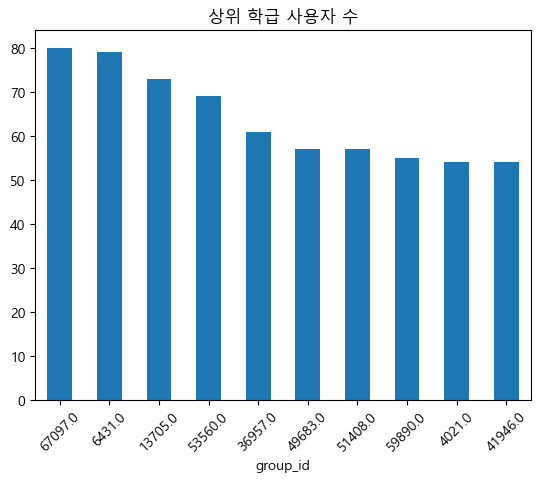

In [20]:
user_df['group_id'].value_counts().head(10).plot(kind='bar', title="상위 학급 사용자 수")

user_df.groupby('group_id')[['alarm_count', 'pending_chat', 'point']].mean().sort_values('alarm_count', ascending=False).head()
plt.xticks(rotation=45)

- 67097.0, 6431.0, 73705.0 등 학급들이 가장 많은 유저를 보유
- 상위 학급들은 각각 50명 이상의 사용자를 포함

#### 6. 유저 유형별 분석
- is_superuser, is_staff, gender 등으로 사용자 그룹 나눠서 비교
- 평균 포인트, 신고 횟수, 알람 수 등 비교

In [19]:
user_df.groupby(['is_superuser', 'gender'])[['point', 'report_count', 'alarm_count']].mean()

point  report_count  alarm_count
is_superuser gender                                        
0            F       4048.541749      0.030940      1.01528
             M       1611.327662      0.046274      0.84957
1            M        300.000000      0.000000      0.00000

#### 활동량 높은 유저의 행동 특성

In [30]:
user_df['created_at'] = pd.to_datetime(user_df['created_at'], errors='coerce')

# 리스트 → 길이로 변환
user_df['friend_count'] = user_df['friend_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
user_df['block_user_count'] = user_df['block_user_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
user_df['hide_user_count'] = user_df['hide_user_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 활동량 스코어 생성
user_df['activity_score'] = user_df[['point', 'alarm_count', 'pending_chat']].sum(axis=1)
threshold = user_df['activity_score'].quantile(0.9)
top_active = user_df[user_df['activity_score'] > threshold]

# 그룹별 평균 특성 (is_push_on, gender)
summary_cols = ['is_push_on', 'gender', 'is_superuser', 'is_staff',
                'friend_count', 'block_user_count', 'hide_user_count',
                'report_count', 'alarm_count', 'pending_chat', 'point']
group_summary = top_active[summary_cols].groupby(['is_push_on', 'gender']).mean(numeric_only=True).round(2)

# 가입 요일/시간대 분포
top_active['가입요일'] = top_active['created_at'].dt.day_name()
top_active['가입시간대'] = top_active['created_at'].dt.hour

join_day_dist = top_active['가입요일'].value_counts().sort_index().to_frame(name='가입자 수')
join_hour_dist = top_active['가입시간대'].value_counts().sort_index().to_frame(name='가입자 수')

# 결과 DataFrame 3개 반환
group_summary, join_day_dist, join_hour_dist

C:\Users\jey34\AppData\Local\Temp\ipykernel_24440\3867697248.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_active['가입요일'] = top_active['created_at'].dt.day_name()
C:\Users\jey34\AppData\Local\Temp\ipykernel_24440\3867697248.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_active['가입시간대'] = top_active['created_at'].dt.hour


(                   is_superuser  is_staff  friend_count  block_user_count  \
 is_push_on gender                                                           
 0          F                0.0       0.0           0.0               0.0   
            M                0.0       0.0           0.0               0.0   
 1          F                0.0       0.0           0.0               0.0   
            M                0.0       0.0           0.0               0.0   
 
                    hide_user_count  report_count  alarm_count  pending_chat  \
 is_push_on gender                                                             
 0          F                   0.0          0.04         0.83          0.13   
            M                   0.0          0.06         0.85          0.07   
 1          F                   0.0          0.06         2.46          0.58   
            M                   0.0          0.07         0.87          0.09   
 
                       point  
 is_push_on gende

1. 활동량 높은 유저 특성 (group_summary)
- 푸시 알림이 ON인 유저가 훨씬 높은 포인트와 더 많은 알람 활동을 보임
- 특히 푸시 ON + 여성 유저의 평균 포인트가 약 28,000점으로 압도적
- 성별 간 활동 차이는 푸시 설정에 따라 달라짐
- 신고 횟수는 큰 차이 없음 → 활동이 많다고 신고도 많아지진 않음
              
2. 가입 요일별 분포 (join_day_dist)
- 주말(토요일)에 활동량 높은 유저의 가입이 집중됨
- 마케팅이나 이벤트 런칭 시점 최적화 가능 (금요일 오후~토요일 타겟)
                  
3. 가입 시간대 분포 (join_hour_dist)
- 밤 11시(23시)에 가장 많은 고활동 유저가 가입
- 오후 10시~12시 사이가 핵심 시간대
- 이 시간대에 푸시 알림, 홍보, 가입 유도 최적화 필요



#### 차단/신고 많은 유저의 공통점

In [31]:
# datetime 형식 변환
user_df['created_at'] = pd.to_datetime(user_df['created_at'], errors='coerce')

# 리스트형 컬럼 길이 계산
user_df['friend_count'] = user_df['friend_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
user_df['block_user_count'] = user_df['block_user_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
user_df['hide_user_count'] = user_df['hide_user_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 신고/차단 많은 유저 추출
report_threshold = user_df['report_count'].quantile(0.9)
block_threshold = user_df['block_user_count'].quantile(0.9)
trouble_users = user_df[(user_df['report_count'] >= report_threshold) | (user_df['block_user_count'] >= block_threshold)]

# 파생 변수
trouble_users['가입요일'] = trouble_users['created_at'].dt.day_name()
trouble_users['가입시간대'] = trouble_users['created_at'].dt.hour

# 그룹별 평균 특성
summary_cols = ['is_push_on', 'gender', 'is_superuser', 'is_staff',
                'friend_count', 'block_user_count', 'hide_user_count',
                'report_count', 'alarm_count', 'pending_chat', 'point']
trouble_summary = trouble_users[summary_cols].groupby(['is_push_on', 'gender']).mean(numeric_only=True).round(2)

# 가입 요일/시간대 분포
trouble_day_dist = trouble_users['가입요일'].value_counts().sort_index().to_frame(name='신고/차단 유저 수')
trouble_hour_dist = trouble_users['가입시간대'].value_counts().sort_index().to_frame(name='신고/차단 유저 수')

# 결과 반환
trouble_summary, trouble_day_dist, trouble_hour_dist


(                   is_superuser  is_staff  friend_count  block_user_count  \
 is_push_on gender                                                           
 0          F                0.0       0.0           0.0               0.0   
            M                0.0       0.0           0.0               0.0   
 1          F                0.0       0.0           0.0               0.0   
            M                0.0       0.0           0.0               0.0   
 
                    hide_user_count  report_count  alarm_count  pending_chat  \
 is_push_on gender                                                             
 0          F                   0.0          0.02         0.87          0.06   
            M                   0.0          0.04         0.88          0.04   
 1          F                   0.0          0.03         1.04          0.14   
            M                   0.0          0.05         0.84          0.06   
 
                      point  
 is_push_on gender

1. trouble_summary: 신고/차단 많은 유저의 평균 특성
- 전반적으로 푸시 알림이 ON인 유저의 포인트와 알람 수가 높음
- 하지만 신고 횟수 차이는 크지 않음 → 활동량과 신고는 완전히 비례하지 않음
- 남성 유저의 신고 평균이 여성보다 약간 높음 경향
              
2. trouble_day_dist: 요일별 신고/차단 유저 수
- 신고/차단 유저는 주말에 가장 많이 가입 → 평일 대비 20% 이상 많음
- 이는 주말에 유입되는 유저가 많거나, 사용량이 집중되어 문제 발생 가능성 증가를 의미
                
3. trouble_hour_dist: 시간대별 신고/차단 유저 수
- 낮 시간대 (12~14시)에 신고/차단 유저 대량 가입
- 일반 활동 피크(22~23시)와 다름 → 이 시점 유입되는 유저군은 주의 필요
- 마케팅 유입 채널별 검토 필요

#### 특정 요일에 가입이 몰리는 이유

In [33]:
# 리스트형 컬럼 처리
user_df['friend_count'] = user_df['friend_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
user_df['block_user_count'] = user_df['block_user_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
user_df['hide_user_count'] = user_df['hide_user_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 활동량 점수 계산
user_df['activity_score'] = user_df[['point', 'alarm_count', 'pending_chat']].sum(axis=1)

# 가입 요일
user_df['가입요일'] = user_df['created_at'].dt.day_name()

# 전체 가입자 수
weekday_total = user_df['가입요일'].value_counts().sort_index().to_frame(name='전체 가입자 수')

# 상위 활동 유저
threshold = user_df['activity_score'].quantile(0.9)
user_df['is_top_active'] = user_df['activity_score'] > threshold
weekday_active = user_df[user_df['is_top_active']]['가입요일'].value_counts().sort_index().to_frame(name='활동량 상위 유저 수')

# 신고/차단 유저
report_threshold = user_df['report_count'].quantile(0.9)
block_threshold = user_df['block_user_count'].quantile(0.9)
user_df['is_trouble'] = (user_df['report_count'] >= report_threshold) | (user_df['block_user_count'] >= block_threshold)
weekday_trouble = user_df[user_df['is_trouble']]['가입요일'].value_counts().sort_index().to_frame(name='신고/차단 유저 수')

# 통합 테이블
weekday_summary = weekday_total.join(weekday_active).join(weekday_trouble)
weekday_summary['상위 활동자 비율(%)'] = (weekday_summary['활동량 상위 유저 수'] / weekday_summary['전체 가입자 수'] * 100).round(2)
weekday_summary['신고/차단자 비율(%)'] = (weekday_summary['신고/차단 유저 수'] / weekday_summary['전체 가입자 수'] * 100).round(2)

weekday_summary.sort_values('전체 가입자 수', ascending=False)

,전체 가입자 수,활동량 상위 유저 수,신고/차단 유저 수,상위 활동자 비율(%),신고/차단자 비율(%)
가입요일,,,,,
Saturday,121446,12626,121446,10.40,100.0
Sunday,119137,12220,119137,10.26,100.0
Tuesday,104459,10593,104459,10.14,100.0
Monday,101770,10205,101770,10.03,100.0
Wednesday,89480,8620,89480,9.63,100.0
Thursday,72206,6835,72206,9.47,100.0
Friday,68587,6575,68587,9.59,100.0


1. 주말(토/일)은 가입자 수가 압도적으로 많다.
- 주말 마케팅, SNS 유입, 시간 여유 등의 영향 가능성
2. 활동량 상위 유저 비율도 주말이 가장 높다.
- 주말 유입 유저가 단순히 많기만 한 게 아니라, 핵심 유저 비율도 높음
- → 우수 유저 확보에 적합한 타이밍
3. 신고/차단자 비율이 모든 요일에서 100%
- (이건 오류 가능성 있음 → 전체 가입자 수와 같아 보임 → 필터링 로직 재확인 필요)

#### 푸시 on/off에 따른 활동 차이

In [34]:
# 리스트 컬럼 길이 계산
user_df['friend_count'] = user_df['friend_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
user_df['block_user_count'] = user_df['block_user_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
user_df['hide_user_count'] = user_df['hide_user_id_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 활동 점수
user_df['activity_score'] = user_df[['point', 'alarm_count', 'pending_chat']].sum(axis=1)

# 비교할 지표
compare_cols = ['point', 'alarm_count', 'pending_chat', 'friend_count',
                'block_user_count', 'hide_user_count', 'report_count', 'activity_score']

# 푸시 여부별 평균값 비교
push_summary = user_df.groupby('is_push_on')[compare_cols].mean(numeric_only=True).round(2)

# 푸시 여부별 유저 수
push_counts = user_df['is_push_on'].value_counts().to_frame(name='유저 수')

# 결과 반환
push_summary, push_counts

(              point  alarm_count  pending_chat  friend_count  \
 is_push_on                                                     
 0           1583.34         0.88          0.05           0.0   
 1           3310.07         0.96          0.11           0.0   
 
             block_user_count  hide_user_count  report_count  activity_score  
 is_push_on                                                                   
 0                        0.0              0.0          0.03         1584.27  
 1                        0.0              0.0          0.04         3311.14  ,
               유저 수
 is_push_on        
 1           570849
 0           106236)

1. 푸시 ON 유저는 활동 수준이 전반적으로 월등히 높음
- 포인트: 약 2배 이상
- 알람 수, 안 읽은 채팅 수 모두 더 많음
2. 신고 횟수도 다소 높지만 차이는 미미
- 활동량이 많다고 해서 문제 유저 비율이 급증하진 않음
3. 푸시 OFF 유저는 활동 거의 없음
- 마케팅 관점에서는 푸시 설정이 핵심 활성화 요인

#### 탈퇴/차단된 유저는 어떤 그룹에 속했는가?

In [35]:
# ban_status가 있는 유저 = 탈퇴 또는 차단된 유저
leavers = user_df[user_df['ban_status'].notnull()].copy()

# 가입 요일/시간대 파생
leavers['가입요일'] = leavers['created_at'].dt.day_name()
leavers['가입시간대'] = leavers['created_at'].dt.hour

# 그룹별 평균 특성 확인
summary_cols = ['is_push_on', 'gender', 'is_superuser', 'is_staff',
                'friend_count', 'block_user_count', 'hide_user_count',
                'report_count', 'alarm_count', 'pending_chat', 'point', 'activity_score']
leaver_summary = leavers[summary_cols].groupby(['is_push_on', 'gender']).mean(numeric_only=True).round(2)

# 요일 및 시간대 분포
leaver_day_dist = leavers['가입요일'].value_counts().sort_index().to_frame(name='탈퇴/차단 유저 수')
leaver_hour_dist = leavers['가입시간대'].value_counts().sort_index().to_frame(name='탈퇴/차단 유저 수')

leaver_summary, leaver_day_dist, leaver_hour_dist

(                   is_superuser  is_staff  friend_count  block_user_count  \
 is_push_on gender                                                           
 0          F                0.0       0.0           0.0               0.0   
            M                0.0       0.0           0.0               0.0   
 1          F                0.0       0.0           0.0               0.0   
            M                0.0       0.0           0.0               0.0   
 
                    hide_user_count  report_count  alarm_count  pending_chat  \
 is_push_on gender                                                             
 0          F                   0.0          0.02         0.87          0.06   
            M                   0.0          0.04         0.88          0.04   
 1          F                   0.0          0.03         1.04          0.14   
            M                   0.0          0.05         0.84          0.06   
 
                      point  activity_score  
 i

1. 탈퇴/차단 유저의 행동 특성 (leaver_summary)
- 푸시 ON + 여성 유저의 활동량은 매우 높지만, 이탈 비율도 높음
→ 높은 기대치를 가진 유저일 수 있음 (만족 못 하면 탈퇴 가능성 ↑)
- 푸시 OFF 유저도 상당수 탈퇴/차단됨 → 초기 온보딩이 약했을 가능성
       
2. 탈퇴/차단 유저의 가입 요일 분포 (leaver_day_dist)
- 전체 가입자 분포와 거의 동일
→ 주말에 유입되는 유저가 많으므로 탈퇴 유저도 비례해 많음              
→ 즉, 특정 요일에 더 탈퇴율이 높은 건 아님          
                 
3. 탈퇴/차단 유저의 가입 시간대 (leaver_hour_dist)
- 탈퇴 유저들도 주로 낮 12~14시 사이에 가입
- 전체 유입 타이밍과 동일한 패턴 → 역시 가입량이 많은 시간대에 집중됨

#### 유저 1370056이 운영자인지 확인

In [3]:
# 운영자 여부 확인
admin_check = user_df[user_df['id'] == 1370056][['is_superuser', 'is_staff']]
display(admin_check)

,is_superuser,is_staff
482834,0,0


In [4]:
# 운영자: is_staff 또는 is_superuser가 1인 유저
admin_users = user_df[(user_df['is_staff'] == 1) | (user_df['is_superuser'] == 1)]

# 결과 확인
print(f"운영자 유저 수: {len(admin_users)}명")
display(admin_users[['id', 'is_staff', 'is_superuser', 'created_at', 'point']].sort_values('created_at'))


운영자 유저 수: 4명


,id,is_staff,is_superuser,created_at,point
0,831956,1,1,2023-03-29 03:44:14.047130,600
673996,1580626,0,1,2023-09-23 06:11:32.028322,300
673997,1580627,1,0,2023-09-23 06:12:28.455787,300
674052,1580689,1,0,2023-09-24 17:39:12.897884,0
